# Biblioteca Pandas

Este tutorial é sobre a utilização da biblioteca Pandas, uma biblioteca Python,  para manipulação e análise de dados. Oferece estruturas de dados e operações para manipular séries, tabelas e dados em painel.

O nome Pandas é derivado da palavra Panel Data (painel de dados), um termo econométrico para conjuntos de dados que incluem observações ao longo do tempo.

Esta biblioteca fornece três estruturas de dados:
1. Series, um vetor de dados do mesmo tipo (uma dimensão)
2. DataFrame, que contem um conjunto de Series, que podem ser de diferentes tipos (duas dimensões). Uma DataFrame pode ser vista como uma tabela de dados da base de dados ou uma folha de Excel.
3. Panel, que contém um conjunto de DataFrame (três dimensões)

A bilbioteca Pandas permite fazer várias coisas como:

- Tratar dados em falta (missing values).
- Indexação implicita e explicita de dados.
- Agregação e transformação de dados (Group By)
- Conversão entre diferentes estruturas de dados (entre Python, NumPy e Pandas).
- Criação de subconjuntos de dados.
- Fusão e união de conjuntos de dados.
- Leitura e importação de dados de ficheiros CSV, TXT, XLSX.
- Geração de intervalo de dados, mudança de data, conversão de frequências e outras funcionalidades de séries temporais.
- Organização fácil de dados e análise de séries temporais.
- Manipulação de dados usando indexação integrada para objectos de dataframe.

Os conteúdos para este tutorial vieram de diversas fontes com particular destaque para a documentação sobre a biblioteca pandas https://pandas.pydata.org/pandas-docs/stable/ e para um tutorial disponível no site https://www.tutorialspoint.com/python_pandas/index.htm.

A estrutura mais utilizada na biblioteca Pandas é a estrutura DataFrame.

A biblioteca Pandas permite um tratamento muito eficaz das séries temporais utilizadas nas finanças.

O primeiro passo para trabalhar com uma biblioteca no Python é importá-la com a utilização do comando import.

In [12]:
#Caso seja necessário instalar
#from platform import python_version
#print(python_version())
#pip install pandas ou !pip install pandas
import pandas as pd


# Estruturas de dados

As principais funcionalidades serão apresentadas de acordo com os tipos de dados do Pandas, com principal destaque para os DataFrames.

## Série

A criação de uma Serie é feita utilizando o seguinte método construtor: pandas.Series( data, index, dtype, copy), que possui os seguintes argumentos:
1. data, que pode vir de diferentes fontes, como ndarray, list ou constantes.
2. index, o inddice tem de ser composto por valores únicos. Se não for indicado nada são utilizados valores de 0,...,n (np.arange(n))
3. dtype, tipo de dados
4. copy, copia as fontes de dados

De seguida apresentam-se alguns exemplos de criação e manipulação de Series

In [17]:
#Criacao de Series
#Criacao de uma serie a partir de um array numpy
import numpy as np
import pandas as pd
data = np.array(['a','b','c','d'])
s1 = pd.Series(data)
print('Serie 1:')
print(s1)
#Criacao de uma serie a partir de um array numpy, passando-lhe os indices
s2_data = np.array(['a','b','c','d'])
s2 = pd.Series(s2_data,index=[100,101,102,103])
print('Serie 2:')
print(s2)
#Criacao de uma serie a partir de um dicionario
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s3 = pd.Series(data)
print('Serie 3:')
print(s3)


Serie 1:
0    a
1    b
2    c
3    d
dtype: object
Serie 2:
100    a
101    b
102    c
103    d
dtype: object
Serie 3:
a    0.0
b    1.0
c    2.0
dtype: float64


In [21]:
#Dar um nome a uma série
s4 = pd.Series(np.random.randn(5), name="Serie 4")
print(s4)

0    1.743994
1   -0.519658
2   -0.454283
3   -0.474847
4    0.607840
Name: Serie 4, dtype: float64


In [23]:
#Com e sem indice definido
s5 = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
print(s5.index)
s6 = pd.Series(np.random.randn(5))
print(s6.index)


Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
RangeIndex(start=0, stop=5, step=1)


In [ ]:
#As series comportam-se como arrays pelo que muitas das operaçoes se mantem
s7 = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
print(s7[:3])
print(s7[s7 > s7.median()])
#também são de um determinado tipo de dados dtype
print(s7.to_numpy())
#também como dicionarios
print(s7['a'])
#operacoes vetorias
print(s7+s7)
print(s7*2)

## Funcionalidades base das Séries

* axes, devolve a lista de rótulos dos eixos
* dtype, devolve o tipo de objeto
* empty, devolve True se a série estiver vazia
* ndim, devolve o número de dimensões dos dados
* size, devolve o número de elementos dos dados
* values, devolve a Serie como um ndarray
* head(), permite ver as primeiras n linhas
* tail(), permite ver as últimas n linhas

In [25]:
import pandas as pd
import numpy as np

#Cria uma série com 100 números aleatórios
s8 = pd.Series(np.random.randn(4))
print('Série s:')
print (s8)
print ("Os eixos da série s são:")
print (s8.axes)
print ("A série s está vazia?")
print (s8.empty)
print ("Dimensoes da série s:")
print (s8.ndim)
print ("Tamanho da série s:")
print (s8.size)
print ("Os valores da série s são:")
print (s8.values)
print ("Os primeiros dois elementos da série s são:")
print (s8.head(2))
print ("Os últimos dois elementos da série s são:")
print (s8.tail(2))

Série s:
0    1.727240
1    1.060417
2    0.815422
3    0.096198
dtype: float64
Os eixos da série s são:
[RangeIndex(start=0, stop=4, step=1)]
A série s está vazia?
False
Dimensoes da série s:
1
Tamanho da série s:
4
Os valores da série s são:
[1.72724001 1.06041726 0.81542228 0.09619752]
Os primeiros dois elementos da série s são:
0    1.727240
1    1.060417
dtype: float64
Os últimos dois elementos da série s são:
2    0.815422
3    0.096198
dtype: float64


## Indexação e seleção de elementos das Series

Muitas das operações de indexação e seleção são similares às disponíveis no Python e na biblioteca NumPy.

Utilização dos indexadores loc (nome do indice), iloc(numero do indice) e ix(misto - em desuso).

In [26]:
#import pandas as pd
s9 = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print(s9)
print(s9['b'])
print('a' in s9)
print(s9.loc['a']) #indicacao explicita do indice
print(s9.iloc[1]) #indicacao da posicao do indice

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5
True
0.25
0.5


### Séries temporais

Uma série temporal é uma sequência de observações em intervalos de tempo regularmente espaçados (ex. variação diária da temperatura num local, taxa de desemprego mensal, variação da população, cotações de ações, etc.).

As séries temporais possuem características como tendência, sazonalidade, ciclos (subidas e descidas sem períodos fixos (sazonalidade)) e movimentos irregulares.

In [ ]:
#Para a definição de uma série temporal é necessário definir como indice um intervalo de datas. Para tal,
#utiliza-se 
#Séries temporais
rng = pd.date_range('2011-03-01 10:15', periods = 10, freq = 'M')
type(rng[0])
#Criar series temporais com um só valor
dates = pd.date_range('2015-01-12', '2015-06-14', freq = 'M')
atemp = pd.Series([100.2, 98, 93, 98, 100], index=dates)
idx = atemp.index[3]
atemp[idx]


rng1 = pd.date_range('2021-11-27', periods = 12, freq='M')
type(rng1)
print(rng1)
st1 = pd.Series([5,10,10,12,17,20,21,23,25,28,23,12],index=rng1)
print(st1)

print(st1['2022-02-28'])

print(st1.index[3])
print(st1[st1.index[3]])



print(st1[3])


15
2021-11-21    14.5
2021-11-22    10.7
2021-11-23     8.5
2021-11-24     9.1
2021-11-25     7.7
Freq: D, dtype: float64
2021-12-01    10.5
2021-12-02    10.2
2021-12-03     8.7
2021-12-04    12.2
2021-12-05    10.6
Freq: D, dtype: float64


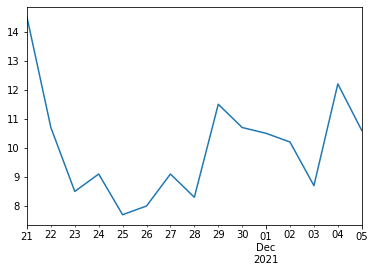

In [33]:
#Criar uma série com as temperaturas entre os dias 21-11-2021 e 05-12-2021
#1. Primeiro cria-se o período temporal que irá servir de indice à série
rng1 = pd.date_range('2021-11-21', periods = 15, freq='D')
#2. Defininem-se os valores das temperaturas para os dias em questão
#Nota: estes valores são reais e foram retirados de meteoblue
st1 = pd.Series([14.5,10.7,8.5,9.1,7.7,8.0,9.1,8.3,11.5,10.7,10.5,10.2,8.7,12.2,10.6]
                ,index=rng1)
#Para desenhar os gráficos pode ter de instalar a bilbioteca matplotlib
#!pip install matplotlib
st1.plot()
#Sugestao casa: criar um vetor de temperaturas que segue a distribuicao normal, tem que acertar com as datas
#vtemp = np.random.normal(20,15,12)
#print(vtemp)

print(st1.size)
print(st1.head())
print(st1.tail())

## DataFrame

A criação de um DataFrame é feita utilizando o seguinte método construtor: pandas.DataFrame( data, index, columns, dtype, copy), que possui os seguintes argumentos:

1. data, são os dados que se passam ao DataFrame e podem ser ndarray, series, map, lists, dict, constantes e outro DataFrame.
2. index, são os rótulos das linhas, se não se passar nada gera inteiros de 0 a n (np.arange(n))
3. columns, são os rótulos das colunas
4. dtype, o tipo de dados de cada coluna
5. copy, indica a cópia dos dados por de entrada

De seguida apresentam-se alguns exemplos de criação e manipulação de DataFrames


In [36]:
#Criacao de DataFrames
import pandas as pd
#Exemplo 1 - a partir de uma lista de valores
data = [1,2,3,4,5]
df1 = pd.DataFrame(data)
print('DataFrame 1:')
print(df1)
#Exemplo 2 - a partir de uma lista de valores de duas dimensões com diferentes tipos de dados e definição do nome das colunas
data = [['Andre',9],['Matilde',11],['Goncalo',12]]
df2 = pd.DataFrame(data,columns=['Nome','Idade'],dtype=float)
print('DataFrame 2:')
print(df2)
#Exemplo 3 - a partir de um dicionario
data = {'Nome':['Andre', 'Matilde'],'Idade':[9,10]}
df3 = pd.DataFrame(data)
print('DataFrame 3:')
print(df3)
#Exemplo 4 -  a paritr de uma lista de dicionarios - contem um missing value marcado como NaN
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df4 = pd.DataFrame(data)
print('DataFrame 4:')
print(df4)
#Exemplo 5 - o exemplo de cima, mas dando títulos às linhas
import pandas as pd
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df5 = pd.DataFrame(data, index=['linha1', 'linha2'])
print('DataFrame 5:')
print(df5)

DataFrame 1:
   0
0  1
1  2
2  3
3  4
4  5
DataFrame 2:
      Nome  Idade
0    Andre    9.0
1  Matilde   11.0
2  Goncalo   12.0
DataFrame 3:
      Nome  Idade
0    Andre      9
1  Matilde     10
DataFrame 4:
   a   b     c
0  1   2   NaN
1  5  10  20.0
DataFrame 5:
        a   b     c
linha1  1   2   NaN
linha2  5  10  20.0


C:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


### Operações sobre DataFrames: 
1. Manipular colunas (mostrar, adicionar, apagar)
2. Manipular linhas (mostrar, adicionar, apagar)

In [37]:
#Mostrar so uma coluna
import pandas as pd
print('Manipular colunas: ')
data = {'col1' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
      'col2' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df6 = pd.DataFrame(data)
print (df6 ['col1'])

#Adicionar uma coluna com base numa serie e com base numa coluna existente na DataFrame
data = {'col1' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
      'col2' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df7 = (pd.DataFrame(data))
# Serie
print ("Adicionar uma nova coluna do tipo Serie:")
df7['col3']=pd.Series([10,20,30],index=['a','b','c'])
print (df7)
# Coluna existente - improtante para contruir campos calculados
print ("Adicioanar uma nova coluna com base em colunas existentes na DataFrame:")
df7['col4']=df7['col1']+df7['col3']
print (df7)

#Apagar uma coluna
data = {'col1' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
     'col2' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd']), 
     'col3' : pd.Series([10,20,30], index=['a','b','c'])}
df8 = pd.DataFrame(data)
print ("DataFrame original:")
print (df8)
print ("Apagar a primeira coluna:")
del df8['col1']
print (df8)

# using pop function
print ("Apagar a segunda coluna com pop:")
df8.pop('col2')
print (df8)

Manipular colunas: 
a    1.0
b    2.0
c    3.0
d    NaN
Name: col1, dtype: float64
Adicionar uma nova coluna do tipo Serie:
   col1  col2  col3
a   1.0     1  10.0
b   2.0     2  20.0
c   3.0     3  30.0
d   NaN     4   NaN
Adicioanar uma nova coluna com base em colunas existentes na DataFrame:
   col1  col2  col3  col4
a   1.0     1  10.0  11.0
b   2.0     2  20.0  22.0
c   3.0     3  30.0  33.0
d   NaN     4   NaN   NaN
DataFrame original:
   col1  col2  col3
a   1.0     1  10.0
b   2.0     2  20.0
c   3.0     3  30.0
d   NaN     4   NaN
Apagar a primeira coluna:
   col2  col3
a     1  10.0
b     2  20.0
c     3  30.0
d     4   NaN
Apagar a segunda coluna com pop:
   col3
a  10.0
b  20.0
c  30.0
d   NaN


In [40]:
#Mais exemplos
import pandas as pd
data = {'linha1' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
     'linha2' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df9 = pd.DataFrame(data)
print('DataFrame df:')
print (df9)
#Aceder a uma linha
print('Retirar os valores da linha com indice 2 (terceira linha):')
print (df9.iloc[2])
#Mostrar varias linhas 
print('Mostrar as linhas com os indices 2 e 3:')
print (df9[2:4])
#Adicionar linhas
df10 = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df11 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])
print('Adicionar as linhas de df2 a df1:')
df10 = df10.append(df11)
print (df10)
#Apagar linhas
print('Apagar linha com a etiqueta 0')
df10 = df10.drop(0) #Apaga as linhas com a etiqueta 0
print (df10)

DataFrame df:
   linha1  linha2
a     1.0       1
b     2.0       2
c     3.0       3
d     NaN       4
Retirar os valores da linha com indice 2 (terceira linha):
linha1    3.0
linha2    3.0
Name: c, dtype: float64
Mostrar as linhas com os indices 2 e 3:
   linha1  linha2
c     3.0       3
d     NaN       4
Adicionar as linhas de df2 a df1:
   a  b
0  1  2
1  3  4
0  5  6
1  7  8
Apagar linha com a etiqueta 0
   a  b
1  3  4
1  7  8


## Funcionalidades base das DataFrames

* T, apresenta a transposta da DataFrame
* axes, devolve a lista de rótulos dos eixos das linhas e colunas
* dtypes, devolve os tipos de objeto
* empty, devolve True se a DataFrame estiver vazia
* ndim, devolve o número de dimensões dos dados
* shape, devolve um tuplo representando o formato da DataFrame
* size, devolve o número de elementos dos dados
* values, devolve a representação NumPy da DataFrame
* head(), permite ver as primeiras n linhas
* tail(), permite ver as últimas n linhas

In [42]:
import pandas as pd
import numpy as np

#Criar um dicionario de series
data = {'Nome':pd.Series(['Antonio','Miguel','Joana','Joao','Liliana','Alcides','Monica']),
   'Idade':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

#Criar a DataFrame
df12 = pd.DataFrame(data)
print ("A DataFrame (séries de dados) e:")
print (df12)
print ("A transposta da DataFrame e:")
print (df12.T)
print ("Rotulos dos eixos das linhas e colunas:")
print (df12.axes)
print ("Tipo de dados de cada coluna:")
print (df12.dtypes)
print ("Vazia?")
print (df12.empty)
print ("Dimensao da DataFrame:")
print (df12.ndim)
print ("Formato da DataFrame:")
print (df12.shape)
print ("Numero total de elementos:")
print (df12.size)
print ("Dados da DataFrame:")
print (df12.values)
print ("Os valores das duas primeiras linhas:")
print (df12.head(2))
print ("Os calores das duas ultimas linhas:")
print (df12.tail(2))

A DataFrame (séries de dados) e:
      Nome  Idade  Rating
0  Antonio     25    4.23
1   Miguel     26    3.24
2    Joana     25    3.98
3     Joao     23    2.56
4  Liliana     30    3.20
5  Alcides     29    4.60
6   Monica     23    3.80
A transposta da DataFrame e:
              0       1      2     3        4        5       6
Nome    Antonio  Miguel  Joana  Joao  Liliana  Alcides  Monica
Idade        25      26     25    23       30       29      23
Rating     4.23    3.24   3.98  2.56      3.2      4.6     3.8
Rotulos dos eixos das linhas e colunas:
[RangeIndex(start=0, stop=7, step=1), Index(['Nome', 'Idade', 'Rating'], dtype='object')]
Tipo de dados de cada coluna:
Nome       object
Idade       int64
Rating    float64
dtype: object
Vazia?
False
Dimensao da DataFrame:
2
Formato da DataFrame:
(7, 3)
Numero total de elementos:
21
Dados da DataFrame:
[['Antonio' 25 4.23]
 ['Miguel' 26 3.24]
 ['Joana' 25 3.98]
 ['Joao' 23 2.56]
 ['Liliana' 30 3.2]
 ['Alcides' 29 4.6]
 ['Monica' 23 3

## Indexação e seleção de dados nos DataFrames

In [ ]:
import pandas as pd
area = pd.Series({'Lisboa': 2761, 'Porto': 2395,
                  'Setubal': 5064, 'Braga': 2673,
                  'Aveiro': 2808})
pop = pd.Series({'Lisboa': 2244984, 'Porto': 2027191,
                  'Setubal': 849842, 'Braga': 848444,
                  'Aveiro': 714351})
df = pd.DataFrame({'area':area, 'pop':pop})
print("DataFrame:")
print(df)
print("DataFrame [area]:")
print(df['area'])
print(df.area)
#Criar uma nova coluna com a densidade populacional
df['densidade'] = df['pop'] / df['area']
print("DataFrame com a densidade populacional:")
print(df)
print(df.iloc[:3, :2])
print(df.loc[:'Lisboa', :'pop'])


DataFrame:
         area      pop
Lisboa   2761  2244984
Porto    2395  2027191
Setubal  5064   849842
Braga    2673   848444
Aveiro   2808   714351
DataFrame [area]:
Lisboa     2761
Porto      2395
Setubal    5064
Braga      2673
Aveiro     2808
Name: area, dtype: int64
Lisboa     2761
Porto      2395
Setubal    5064
Braga      2673
Aveiro     2808
Name: area, dtype: int64
DataFrame com a densidade populacional:
         area      pop   densidade
Lisboa   2761  2244984  813.105397
Porto    2395  2027191  846.426305
Setubal  5064   849842  167.820300
Braga    2673   848444  317.412645
Aveiro   2808   714351  254.398504
         area      pop
Lisboa   2761  2244984
Porto    2395  2027191
Setubal  5064   849842
        area      pop
Lisboa  2761  2244984


## Funções estatísticas das DataFrames

* count(), numero de observações não nulas
* sum(), soma dos valores
* mean(), média dos valores
* median(), mediana dos valores
* mode(), moda dos valores
* std(), desvio padrão dos valores
* min(), minimo dos valores
* max(), maximo dos valores
* abs(), valor absoluto
* prod(), produto dos valores
* cumsum(), soma cumulativa
* cumprod(), produto cumulativo
* describe(), apresenta várias estatísticas

In [ ]:
import pandas as pd
import numpy as np

#Criar um dicionario de series
d = {'Nome':pd.Series(['Antonio','Miguel','Joana','Joao','Liliana','Alcides','Monica']),
   'Idade':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

#Criar a DataFrame
df = pd.DataFrame(d)
print (df.describe())

           Idade    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000


## Funções estatísticas envolvendo mais de uma Serie ou DataFrame

A biblioteca Pandas possui funções estatísticas que permitem cálculo de algumas métricas entre Series:
* pct_change()
* cov(), convariância
* corr(), correlação
* rank(), produz um ranking dos elementos dentro de uma série

In [ ]:
import pandas as pd
import numpy as np

print("Serie s:")
s = pd.Series([1,2,3,4,5,4])
print(s)
#Percentagem de elementos diferentes
print('Mostras a diferença em percentagem entre o primeiro elemento da série e os seguintes:')
print(s.pct_change())

#Covariancia
print('Covariancia 1:')
s1 = pd.Series(np.random.randn(10))
s2 = pd.Series(np.random.randn(10))
print(s1)
print(s2)
print (s1.cov(s2))

#Covariancia
print('Covariancia 2:')
df = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
print (df['a'].cov(df['b']))
print (df.cov())

#Correlacao
print('Correlacao:')
print (df['a'].corr(df['b']))
print (df.corr())

#Ranking dos elementos
print('Ranking:')
s = pd.Series(np.random.np.random.randn(5), index=list('abcde'))
s['d'] = s['b'] # igualar d a b ficando com dois elementos iguais
print(s)
print (s.rank())

Serie s:
0    1
1    2
2    3
3    4
4    5
5    4
dtype: int64
Mostras a diferença em percentagem entre o primeiro elemento da série e os seguintes:
0         NaN
1    1.000000
2    0.500000
3    0.333333
4    0.250000
5   -0.200000
dtype: float64
Covariancia 1:
0   -0.411259
1   -0.853258
2    0.142857
3    0.642816
4    0.348053
5   -1.509783
6   -0.435278
7    1.760535
8   -1.779805
9    0.227987
dtype: float64
0    0.823985
1    0.329249
2    1.093144
3    0.823534
4    0.954021
5   -0.411819
6   -0.034461
7   -0.623752
8    0.142622
9    1.519503
dtype: float64
0.09898546494664531
Covariancia 2:
-0.3166576841398682
          a         b         c         d         e
a  0.641919 -0.316658 -0.437904  0.147317  0.140127
b -0.316658  0.664250  0.347788 -0.236535 -0.084727
c -0.437904  0.347788  1.035135  0.087937 -0.219516
d  0.147317 -0.236535  0.087937  1.022554 -0.064483
e  0.140127 -0.084727 -0.219516 -0.064483  0.220761
Correlacao:
-0.4849355100064563
          a         b      

## Janelas de períodos

Os métodos rolling, expanding e ewm permitem aplicar as funções estatísticas a partes dos dados agrupadas em períodos, permitindo por exemplo calcular a média de três em três linhas.

O método rolling permite cálculo de uma função estatística como a média com uma determinada janela de períodos (de 3 em 3 dias).

O método expanding permite algo similar ao rolling mas inclui todos os registos anteriores, até ao registo em questão.

O método exponential weighted permite correr funções com base exponencial, como a média. 

Estes métodos têm aplicação especial em séries temporais.

Ver o exemplo 2 com as cotações do BCP.

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10, 4),
index = pd.date_range('1/1/2000', periods=10),
columns = ['A', 'B', 'C', 'D'])

print (df)
#Rolling
print('Calculo da media dos ultimos três períodos para cada elemento:')
print('Para os dois primeiros elementos não é possível fazer o cálculo.')
print (df.rolling(window=3).mean())
#Este metodo permite criar medias moveis para os precos de acoes
#Expanding
print('Calculo da media dos ultimos três períodos desde o inicio:')
print (df.expanding(min_periods=3).mean())
#EWM
print (df.ewm(com=0.5).mean())

ser = pd.Series(np.arange(1, 11))
print(ser)
print(ser.rolling(window=3).mean())
print(ser.expanding(min_periods=3).mean())
print(ser.ewm(com=0.5).mean())

                   A         B         C         D
2000-01-01  0.299320  0.337775  1.572130  0.813066
2000-01-02  0.372380  1.499929  0.438345 -1.639736
2000-01-03  0.275968 -0.427175 -0.795429 -1.608002
2000-01-04  0.747039 -2.133681 -1.137718 -0.890529
2000-01-05  0.655720 -0.012776  2.174346  1.259468
2000-01-06  0.693599  0.076697 -1.630828 -0.443257
2000-01-07  0.898225 -1.483063 -1.805880  0.665046
2000-01-08 -0.551366  0.115024  2.262541  1.545026
2000-01-09  2.765456  1.492193 -0.816284 -0.756878
2000-01-10 -0.207101  1.124304 -0.848665 -0.002362
Calculo da media dos ultimos três períodos para cada elemento:
Para os dois primeiros elementos não é possível fazer o cálculo.
                   A         B         C         D
2000-01-01       NaN       NaN       NaN       NaN
2000-01-02       NaN       NaN       NaN       NaN
2000-01-03  0.315889  0.470176  0.405015 -0.811557
2000-01-04  0.465129 -0.353642 -0.498267 -1.379422
2000-01-05  0.559576 -0.857877  0.080400 -0.413021
2000-

Com base nas funções anteriores é possível utilizar funções de agregação para os diferentes horizontes temporais.

De seguida mostram-se alguns exemplos.

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10, 4),
      index = pd.date_range('1/1/2000', periods=10),
      columns = ['A', 'B', 'C', 'D'])
print (df)

print('Soma dos elementos de três em três.')
r = df.rolling(window=3,min_periods=1)
print (r.aggregate(np.sum))

print('Soma e média dos elementos de três em três.')
r = df.rolling(window=3,min_periods=1)
print (r.aggregate([np.sum,np.mean]))

print('Soma dos elementos da coluna A e média dos elementos da coluna B de três em três.')
r = df.rolling(window=3,min_periods=1)
print (r.aggregate({'A' : np.sum,'B' : np.mean}))

                   A         B         C         D
2000-01-01 -0.485945  0.379136 -1.676568  1.022409
2000-01-02 -0.062837  0.776757 -1.434909  1.324261
2000-01-03 -0.881711 -0.316243 -0.441736 -1.484995
2000-01-04  1.604739  1.189257  0.492460 -0.509111
2000-01-05 -0.230772 -1.656076  0.917717  0.864738
2000-01-06 -0.918752 -0.846284  0.037941  0.375355
2000-01-07 -1.779829 -2.721891  1.221974  0.190409
2000-01-08 -0.439844  0.428963 -0.241009 -0.021279
2000-01-09  0.833346  1.015962  1.106776 -1.191750
2000-01-10  1.080703 -0.270076 -0.904602  0.574196
Soma dos elementos de três em três.
                   A         B         C         D
2000-01-01 -0.485945  0.379136 -1.676568  1.022409
2000-01-02 -0.548782  1.155893 -3.111477  2.346671
2000-01-03 -1.430493  0.839649 -3.553213  0.861676
2000-01-04  0.660190  1.649770 -1.384185 -0.669845
2000-01-05  0.492255 -0.783062  0.968441 -1.129368
2000-01-06  0.455214 -1.313102  1.448118  0.730981
2000-01-07 -2.929353 -5.224250  2.177632  1.43

## Funções aplicadas a todos os elementos da DataFrame

* pipe(), apply() e applymap()

In [ ]:
import pandas as pd
import numpy as np

def adder(ele1,ele2):
    return ele1+ele2

df = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
print('DataFrame:')
print(df)
print('Adiciona o valor 2 aos elementos da DataFrame:')
print(df.pipe(adder,2))
print('Calcula a média dos valores relativos a cada coluna:')
print(df.apply(np.mean))
print('Calcula a média dos valores relativos a cada linha:')
print (df.apply(np.mean,axis=1))
print('Corre uma função lambda em todos os elementos, neste caso o valor maximo - valor minimo:')
print(df.apply(lambda x: x.max() - x.min()))
print('Corre uma função particular só numa coluna')
print(df['col1'].map(lambda x:x*100)) #ou df.applymap(lambda x:x*100)
print(df)

DataFrame:
       col1      col2      col3
0 -1.375413 -1.156919 -0.905433
1 -0.373672 -1.170658  0.412996
2 -1.426718  1.478489 -0.287914
3 -1.503683 -0.878417 -1.511243
4  0.486678  0.456320  0.594039
Adiciona o valor 2 aos elementos da DataFrame:
       col1      col2      col3
0  0.624587  0.843081  1.094567
1  1.626328  0.829342  2.412996
2  0.573282  3.478489  1.712086
3  0.496317  1.121583  0.488757
4  2.486678  2.456320  2.594039
Calcula a média dos valores relativos a cada coluna:
col1   -0.838562
col2   -0.254237
col3   -0.339511
dtype: float64
Calcula a média dos valores relativos a cada linha:
0   -1.145922
1   -0.377111
2   -0.078714
3   -1.297781
4    0.512346
dtype: float64
Corre uma função lambda em todos os elementos, neste caso o valor maximo - valor minimo:
col1    1.990360
col2    2.649148
col3    2.105282
dtype: float64
Corre uma função particular só numa coluna
0   -137.541312
1    -37.367177
2   -142.671790
3   -150.368268
4     48.667760
Name: col1, dtype: float

## Missing values

Os missing values (valores em falta) podem ser de dois tipos:
* None, que representa um valor nulo
* NaN, Not a Number, que representa um valor que não é um número

A bilbioteca Pandas possui métodos para detetar os valores nulos, nomeadamente, os isnull() e notnull().

A biblioteca Pandas possui métodos para substituir os valores nulos:
* dropna() para remover o valor NaN
* fillna() que preenche com outros valores e tem três opções:
    * valor indicado pelo utilizador
    * ffill, que preenche para a frente todos os valores seguintes com o valor igual ao anterior
    * bfill, que preenche para trás com todos os valores seguintes com o valor igual ao aanterior

In [ ]:
import numpy as np
import pandas as pd

v1 = np.array([1, None, 3, 4])
print(v1)
print(v1.dtype)

v2 = np.array([1, np.nan, 3, 4]) 
print(v2)
print(v2.dtype)

#Operacoes de numeros com NaN devolvem outros NaN
print(v2[1]+5)
print(v2.sum())

#Detecao de valores nulos
s1 = pd.Series(np.array([1, None, 3, 4]))

print(s1.isnull())
print(s1.notnull())

#Tratamento de valores nulos
#Remocao
s2 = pd.Series(np.array([1, np.nan, 3, 4]))
s2.dropna()
print(s2)

#Substituicao do valor NaN por zero (0)
s2 = pd.Series(np.array([1, np.nan, 3, 4]))
print('Preenche com o valor 0:')
print(s2.fillna(0))

#forward-fill
print('Preenche com o valor anterior para a frente:')
print(s2.fillna(method='ffill'))

#back-fill
print('Preenche com o valor anterior para trás:')
print(s2.fillna(method='bfill'))


[1 None 3 4]
object
[ 1. nan  3.  4.]
float64
nan
nan
0    False
1     True
2    False
3    False
dtype: bool
0     True
1    False
2     True
3     True
dtype: bool
0    1.0
1    NaN
2    3.0
3    4.0
dtype: float64
Preenche com o valor 0:
0    1.0
1    0.0
2    3.0
3    4.0
dtype: float64
Preenche com o valor anterior para a frente:
0    1.0
1    1.0
2    3.0
3    4.0
dtype: float64
Preenche com o valor anterior para trás:
0    1.0
1    3.0
2    3.0
3    4.0
dtype: float64


De seguida apresentam-se algumas operações disponíveis na bilioteca Pandas sobre os DataFrames:
    
* Reindexing, rearranjar os dados de um DataFrame para que fiquem com o formato de outro DataFrame
* Iteration, permite iterar o DataFrame
* Sorting, permite ordenar o DataFrame
* Indexing e Slicing, permite escolher os elementos do DataFrame


In [ ]:
import pandas as pd
import numpy as np

#Reindexing
print('Reindexing:')
df1 = pd.DataFrame(np.random.randn(6,3),columns=['col1','col2','col3'])
df2 = pd.DataFrame(np.random.randn(2,3),columns=['col1','col2','col3'])
print(df1)
print(df2)
#Reformatar o df2 como o df1 
print (df2.reindex_like(df1))
# Preencher os NaNs com o valor da ultima linha
print ("Preencher os NaNs com o valor da ultima linha:")
print (df2.reindex_like(df1,method='ffill'))

Reindexing:
       col1      col2      col3
0 -0.528198  0.358808 -0.015341
1 -0.300716  2.040540  1.694821
2 -1.084904  3.241952 -0.028769
3  0.657485  0.611788 -0.014353
4 -0.024386 -0.612256 -0.753900
5  1.897224  0.338274  0.213814
      col1      col2      col3
0 -0.74914 -0.328556 -0.553687
1  0.80856  0.177841 -0.259539
      col1      col2      col3
0 -0.74914 -0.328556 -0.553687
1  0.80856  0.177841 -0.259539
2      NaN       NaN       NaN
3      NaN       NaN       NaN
4      NaN       NaN       NaN
5      NaN       NaN       NaN
Preencher os NaNs com o valor da ultima linha:
      col1      col2      col3
0 -0.74914 -0.328556 -0.553687
1  0.80856  0.177841 -0.259539
2  0.80856  0.177841 -0.259539
3  0.80856  0.177841 -0.259539
4  0.80856  0.177841 -0.259539
5  0.80856  0.177841 -0.259539


In [ ]:
#Iterar (Iteration)
print('Iterar (percorrer) um DataFrame:')
import pandas as pd
import numpy as np
 
df = pd.DataFrame(np.random.randn(4,3),columns=['col1','col2','col3'])
print (df)

print('Colunas:')
for col in df:
    print(col)

print('Chaves e valores (coluna a coluna):')
for key,value in df.iteritems():
    print(key,value)

print('Chaves e valores (linha a linha):')
for row_index,row in df.iterrows():
    print(row_index,row)
    
#A iteracao de valores destina-se a mostrar valores, nao serve para alterar valores

Iterar (percorrer) um DataFrame:
       col1      col2      col3
0  1.763146  0.803398 -0.715978
1  0.988646  1.212171 -0.772312
2 -0.565285  2.718460  0.191423
3 -1.442982  0.160268 -1.140318
Colunas:
col1
col2
col3
Chaves e valores (coluna a coluna):
col1 0    1.763146
1    0.988646
2   -0.565285
3   -1.442982
Name: col1, dtype: float64
col2 0    0.803398
1    1.212171
2    2.718460
3    0.160268
Name: col2, dtype: float64
col3 0   -0.715978
1   -0.772312
2    0.191423
3   -1.140318
Name: col3, dtype: float64
Chaves e valores (linha a linha):
0 col1    1.763146
col2    0.803398
col3   -0.715978
Name: 0, dtype: float64
1 col1    0.988646
col2    1.212171
col3   -0.772312
Name: 1, dtype: float64
2 col1   -0.565285
col2    2.718460
col3    0.191423
Name: 2, dtype: float64
3 col1   -1.442982
col2    0.160268
col3   -1.140318
Name: 3, dtype: float64


In [ ]:
#Ordenacao (Sorting)

import pandas as pd
import numpy as np

unsorted_df=pd.DataFrame(np.random.randn(10,2),index=[1,4,6,2,3,5,9,8,0,7],columns=['col2','col1'])
print(unsorted_df)

#Ordenacao por indice
sorted_df=unsorted_df.sort_index()
print(sorted_df)

#Ordenacao ascendente/descendente por indice
sorted_df = unsorted_df.sort_index(ascending=False)
print(sorted_df)

#Ordenacao dos nomes das colunas
sorted_df=unsorted_df.sort_index(axis=1)
print(sorted_df)

#Ordenacao pelos valores da col1
sorted_df = unsorted_df.sort_values(by='col1')
print(sorted_df)

#Ordenacao pelos valores da col1 seguidos da col2
sorted_df = unsorted_df.sort_values(by=['col1','col2'])
print(sorted_df)

       col2      col1
1 -0.851159  0.801870
4 -0.211426  1.307653
6  0.089314 -0.898741
2 -0.265338 -0.804636
3  0.499927  0.077550
5 -1.620536  0.250127
9 -1.563120 -0.101414
8 -0.588065  0.460111
0  0.670538 -1.673101
7  0.709982  1.423345
       col2      col1
0  0.670538 -1.673101
1 -0.851159  0.801870
2 -0.265338 -0.804636
3  0.499927  0.077550
4 -0.211426  1.307653
5 -1.620536  0.250127
6  0.089314 -0.898741
7  0.709982  1.423345
8 -0.588065  0.460111
9 -1.563120 -0.101414
       col2      col1
9 -1.563120 -0.101414
8 -0.588065  0.460111
7  0.709982  1.423345
6  0.089314 -0.898741
5 -1.620536  0.250127
4 -0.211426  1.307653
3  0.499927  0.077550
2 -0.265338 -0.804636
1 -0.851159  0.801870
0  0.670538 -1.673101
       col1      col2
1  0.801870 -0.851159
4  1.307653 -0.211426
6 -0.898741  0.089314
2 -0.804636 -0.265338
3  0.077550  0.499927
5  0.250127 -1.620536
9 -0.101414 -1.563120
8  0.460111 -0.588065
0 -1.673101  0.670538
7  1.423345  0.709982
       col2      col1
0  0.67053

## GroupBy

Similar à função GroupBy do SQL permite agrupar os itens por tipo.

Associada a esta função é possível executar operações de agregação, transformação e filtragem dos dados.

In [ ]:
# import the pandas library
import pandas as pd
import numpy as np

campeonato = {'Equipa': ['FCP', 'FCP', 'SLB', 'SLB', 'SCP', 'SCP', 'SCP', 'SCP', 'FCP', 'SLB', 'SLB', 'Boavista'], 
              'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
              'Ano': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
              'Pontos':[87,78,86,67,74,81,75,78,69,70,80,69]}
df = pd.DataFrame(campeonato)

print(df)
df_equipa = df.groupby('Equipa')

print('Mostrar os grupos criados')
for nome_grupo,resultados_grupo in df_equipa:
    print (nome_grupo)
    print (resultados_grupo)
    
print('Mostrar só um dos grupos')
print(df_equipa.get_group('FCP'))

print('Calcular metricas agregadas:')
print(df_equipa.agg(np.size))
print(df_equipa['Pontos'].agg([np.sum, np.mean, np.std]))

print('Efetuar transformações nos dados:')
print (df_equipa.transform(lambda x: x/10))

print('Filtrar os dados:')
print (df_equipa.filter(lambda x: len(x) >= 3))

      Equipa  Rank   Ano  Pontos
0        FCP     1  2014      87
1        FCP     2  2015      78
2        SLB     2  2014      86
3        SLB     3  2015      67
4        SCP     3  2014      74
5        SCP     4  2015      81
6        SCP     1  2016      75
7        SCP     1  2017      78
8        FCP     2  2016      69
9        SLB     4  2014      70
10       SLB     1  2015      80
11  Boavista     2  2017      69
Mostrar os grupos criados
Boavista
      Equipa  Rank   Ano  Pontos
11  Boavista     2  2017      69
FCP
  Equipa  Rank   Ano  Pontos
0    FCP     1  2014      87
1    FCP     2  2015      78
8    FCP     2  2016      69
SCP
  Equipa  Rank   Ano  Pontos
4    SCP     3  2014      74
5    SCP     4  2015      81
6    SCP     1  2016      75
7    SCP     1  2017      78
SLB
   Equipa  Rank   Ano  Pontos
2     SLB     2  2014      86
3     SLB     3  2015      67
9     SLB     4  2014      70
10    SLB     1  2015      80
Mostrar só um dos grupos
  Equipa  Rank   Ano  

## Join

O Pandas permite operações similares às operações JOIN das bases de dados.

O prototipo da função é: pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True)

onde:
* left − A DataFrame object.
* right − Another DataFrame object.
* on − Columns (names) to join on. Must be found in both the left and right DataFrame objects.
* left_on − Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame.
* right_on − Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame.
* left_index − If True, use the index (row labels) from the left DataFrame as its join key(s). In case of a DataFrame with a MultiIndex (hierarchical), the number of levels must match the number of join keys from the right DataFrame.
* right_index − Same usage as left_index for the right DataFrame.
* how − One of 'left', 'right', 'outer', 'inner'. Defaults to inner. Each method has been described below.
* sort − Sort the result DataFrame by the join keys in lexicographical order. Defaults to True, setting to False will improve the performance substantially in many cases.


In [ ]:
import pandas as pd

df_esquerda = pd.DataFrame({
         'Id':[1,2,3,4,5],
         'Nome': ['Antonio', 'Armando', 'Ana', 'Alice', 'Amalia'],
         'Curso':['c1','c2','c4','c6','c5']})
df_direita = pd.DataFrame(
         {'Id':[1,2,3,4,5],
         'Nome': ['Joao', 'Joana', 'Julia', 'Josefina', 'Jorge'],
         'Curso':['c2','c4','c3','c6','c5']})
print (df_esquerda)
print (df_direita)
print('Juntar dois df por chave, neste caso Id (Inner Join):')
print (pd.merge(df_esquerda,df_direita,on='Id'))
print('Juntar dois df por chave, neste caso Id e Curso  (Inner Join):')
print (pd.merge(df_esquerda,df_direita,on=['Id','Curso']))
print('Left Join pelo Curso:')
print (pd.merge(df_esquerda,df_direita,on='Curso', how='left'))
print('Right Join pelo Curso:')
print (pd.merge(df_esquerda,df_direita,on='Curso', how='right'))
print('Outer Join pelo Curso:')
print (pd.merge(df_esquerda,df_direita, how='outer', on='Curso'))
print('Inner Join pelo Curso:')
print (pd.merge(df_esquerda,df_direita, how='inner', on='Curso'))

   Id     Nome Curso
0   1  Antonio    c1
1   2  Armando    c2
2   3      Ana    c4
3   4    Alice    c6
4   5   Amalia    c5
   Id      Nome Curso
0   1      Joao    c2
1   2     Joana    c4
2   3     Julia    c3
3   4  Josefina    c6
4   5     Jorge    c5
Juntar dois df por chave, neste caso Id (Inner Join):
   Id   Nome_x Curso_x    Nome_y Curso_y
0   1  Antonio      c1      Joao      c2
1   2  Armando      c2     Joana      c4
2   3      Ana      c4     Julia      c3
3   4    Alice      c6  Josefina      c6
4   5   Amalia      c5     Jorge      c5
Juntar dois df por chave, neste caso Id e Curso  (Inner Join):
   Id  Nome_x Curso    Nome_y
0   4   Alice    c6  Josefina
1   5  Amalia    c5     Jorge
Left Join pelo Curso:
   Id_x   Nome_x Curso  Id_y    Nome_y
0     1  Antonio    c1   NaN       NaN
1     2  Armando    c2   1.0      Joao
2     3      Ana    c4   2.0     Joana
3     4    Alice    c6   4.0  Josefina
4     5   Amalia    c5   5.0     Jorge
Right Join pelo Curso:
   Id_x   

## Concatenação de Series

Método para combinar Series, DataFrames e Panels.

Sintaxe: pd.concat(objs,axis=0,join='outer',join_axes=None,ignore_index=False)
    
Onde:
* objs − This is a sequence or mapping of Series, DataFrame, or Panel objects.
* axis − {0, 1, ...}, default 0. This is the axis to concatenate along.
* join − {‘inner’, ‘outer’}, default ‘outer’. How to handle indexes on other axis(es). Outer for union and inner for intersection.
* ignore_index − boolean, default False. If True, do not use the index values on the concatenation axis. The resulting axis will be labeled 0, ..., n - 1.
* join_axes − This is the list of Index objects. Specific indexes to use for the other (n-1) axes instead of performing inner/outer set logic.


In [ ]:
import pandas as pd

df1 = pd.DataFrame({
         'Id':[1,2,3,4,5],
         'Nome': ['Antonio', 'Armando', 'Ana', 'Alice', 'Amalia'],
         'Curso':['c1','c2','c4','c6','c5']})
df2 = pd.DataFrame(
         {'Id':[1,2,3,4,5],
         'Nome': ['Joao', 'Joana', 'Julia', 'Josefina', 'Jorge'],
         'Curso':['c2','c4','c3','c6','c5']})

print('Concatena mantendo os indices originais:')
print (pd.concat([df1,df2]))
print('Concatena criando novos indices para o novo DataFrame:')
print (pd.concat([df1,df2],keys=['x','y']))
print('Concatena alterando os indices originais:')
print (pd.concat([df1,df2],keys=['x','y'],ignore_index=True))
print('Concatena ao longo das colunas:')
print (pd.concat([df1,df2],axis=1))


Concatena mantendo os indices originais:
   Id      Nome Curso
0   1   Antonio    c1
1   2   Armando    c2
2   3       Ana    c4
3   4     Alice    c6
4   5    Amalia    c5
0   1      Joao    c2
1   2     Joana    c4
2   3     Julia    c3
3   4  Josefina    c6
4   5     Jorge    c5
Concatena criando novos indices para o novo DataFrame:
     Id      Nome Curso
x 0   1   Antonio    c1
  1   2   Armando    c2
  2   3       Ana    c4
  3   4     Alice    c6
  4   5    Amalia    c5
y 0   1      Joao    c2
  1   2     Joana    c4
  2   3     Julia    c3
  3   4  Josefina    c6
  4   5     Jorge    c5
Concatena alterando os indices originais:
   Id      Nome Curso
0   1   Antonio    c1
1   2   Armando    c2
2   3       Ana    c4
3   4     Alice    c6
4   5    Amalia    c5
5   1      Joao    c2
6   2     Joana    c4
7   3     Julia    c3
8   4  Josefina    c6
9   5     Jorge    c5
Concatena ao longo das colunas:
   Id     Nome Curso  Id      Nome Curso
0   1  Antonio    c1   1      Joao    c2


## Datas

Um dos pontos fortes da biblioteca Pandas é o trabalho com séries temporais e consecutivamente com Datas.

Se sugida apresentam-se algumas funções de manipulção de datas.

In [ ]:
#Criar um intervalo de datas
import pandas as pd
print('Dias:')
print (pd.date_range('28/4/2018', periods=5))
print('Meses:')
print (pd.date_range('28/4/2018', periods=5, freq='M'))
print('Dias de trabalho:')
print (pd.bdate_range('28/4/2018', periods=5))
print('Entre duas datas:')
start = pd.datetime(2018, 4, 12)
end = pd.datetime(2018, 4, 23)
print (pd.date_range(start, end))

Dias:
DatetimeIndex(['2018-04-28', '2018-04-29', '2018-04-30', '2018-05-01',
               '2018-05-02'],
              dtype='datetime64[ns]', freq='D')
Meses:
DatetimeIndex(['2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31'],
              dtype='datetime64[ns]', freq='M')
Dias de trabalho:
DatetimeIndex(['2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03',
               '2018-05-04'],
              dtype='datetime64[ns]', freq='B')
Entre duas datas:
DatetimeIndex(['2018-04-12', '2018-04-13', '2018-04-14', '2018-04-15',
               '2018-04-16', '2018-04-17', '2018-04-18', '2018-04-19',
               '2018-04-20', '2018-04-21', '2018-04-22', '2018-04-23'],
              dtype='datetime64[ns]', freq='D')


# Inserir formatacao de datas

## Visualização de dados

A biblioteca Pandas permite desenhar gráficos relativos aos dados contidos no DataFrame.

De seguida apresentam-se alguns exemplos ilustrativos.

                   A         B         C         D
2017-01-01 -2.315744 -0.306599 -0.231872  0.383765
2017-01-02  1.758058  1.532032  0.251546 -0.560809
2017-01-03 -1.762452 -0.854783 -0.159180 -1.075786
2017-01-04 -1.076937 -0.494090 -3.159721  0.378195
2017-01-05  1.210771  0.850044 -1.190223 -1.111625
2017-01-06 -0.375723  0.052824  0.077790 -0.249120
2017-01-07  0.927201 -0.001841  0.683157 -0.165518
2017-01-08 -2.092119  0.882818 -1.474019  0.045209
2017-01-09  2.401299  0.536956 -0.017639 -0.383643
2017-01-10  0.145009  1.773276  0.668204 -1.112380


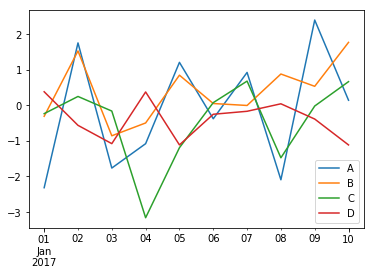

In [ ]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(10,4),index=pd.date_range('1/1/2017', periods=10), columns=list('ABCD'))
print(df)
df.plot()

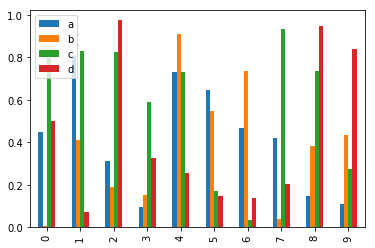

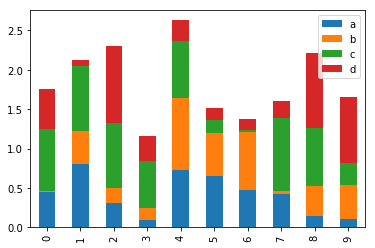

In [ ]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot.bar()
df.plot.bar(stacked=True)

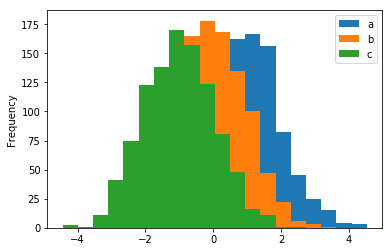

In [ ]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({'a':np.random.randn(1000)+1,'b':np.random.randn(1000),'c':np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df.plot.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262FFB05C88>,
      dtype=object)

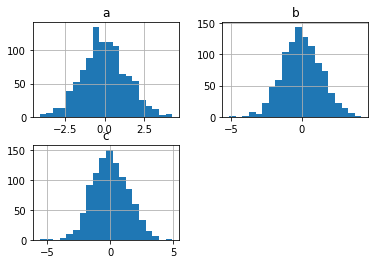

In [ ]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.DataFrame({'a':np.random.randn(1000)+1,'b':np.random.randn(1000),'c':np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df.diff().hist(bins=20)

          A         B         C         D         E
0  0.625632  0.169537  0.078996  0.555315  0.350488
1  0.846870  0.550270  0.296798  0.634216  0.372861
2  0.691557  0.624188  0.542132  0.060640  0.155963
3  0.676375  0.241115  0.269366  0.824069  0.736160
4  0.238176  0.529626  0.057478  0.166132  0.778786
5  0.722693  0.154028  0.118199  0.632196  0.979627
6  0.899871  0.932583  0.271731  0.072189  0.837340
7  0.608036  0.224400  0.357950  0.237312  0.680974
8  0.083333  0.430060  0.244191  0.538420  0.754092
9  0.419181  0.058692  0.755517  0.101605  0.935530


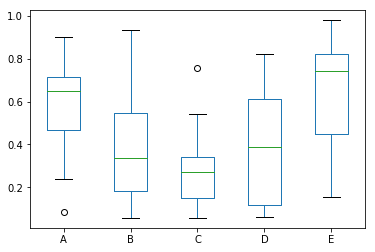

In [ ]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
print(df)
df.plot.box()

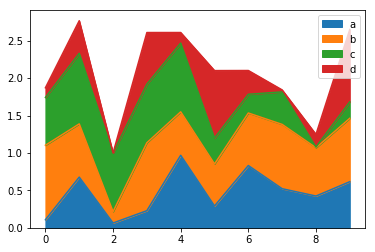

In [ ]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area()

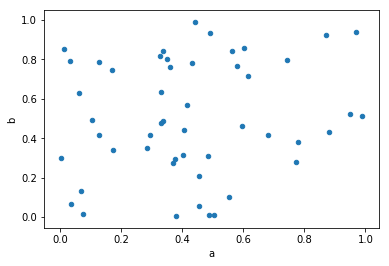

In [ ]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')

## Leitura e escrita de dados

A biblioteca Pandas possui métodos para ler e escrever de ficheiros:
* read_csv e to_csv, para ler e escrever dados separados por vírgulas (texto)
* read_json e to_json, para ler e escrever dados no formato json
* read_html e to_html, para ler e escrever html
* read_clipboard e to_clipboard, para ler e escrever para o clipboard (texto)
* read_excel e to_excel, para ler e escrever par ficheiros Excel
* read_hdf e to_hdf (HDF5)
* read_feather e to_feather (Feather Format)
* read_parquet e to_parquet (PArquet Format)
* read_msgpack e to_msgpack (Msgpack)
* read_stata e to_stata (STATA)
* read_sas (SAS)
* read_pickle e to_pickle (Python Pickle Format)
* read_sql e to_sql (SQL)
* read_gbq e to_gbq (Google Big Query)

O método que irá ser apresentado neste tutorial é o método read_csv, cujo protótipo é:

pandas.read_csv(filepath_or_buffer, sep=', ', dialect=None, compression=None, doublequote=True, escapechar=None, quotechar='"', quoting=0, skipinitialspace=False, lineterminator=None, header='infer', index_col=None, names=None, prefix=None, skiprows=None, skipfooter=None, skip_footer=0, na_values=None, na_fvalues=None, true_values=None, false_values=None, delimiter=None, converters=None, dtype=None, usecols=None, engine=None, delim_whitespace=False, as_recarray=False, na_filter=True, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, warn_bad_lines=True, error_bad_lines=True, keep_default_na=True, thousands=None, comment=None, decimal='.', parse_dates=False, keep_date_col=False, dayfirst=False, date_parser=None, memory_map=False, float_precision=None, nrows=None, iterator=False, chunksize=None, verbose=False, encoding=None, squeeze=False, mangle_dupe_cols=True, tupleize_cols=False, infer_datetime_format=False, skip_blank_lines=True)

Como se pode ver possui imensos parametros sendo os mais comummente utilizados, o filepath_or_buffer, que indica o caminho para o ficheiro, o sep que indica o separador a utilizar, dtype, que indica o tipo de dados, o index_col que indica a coluna a utilizar como rótulos das linhas e o usecols que indica qual o subconjunto de colunas a importar.

In [ ]:
import pandas as pd
df=pd.read_csv("pytrigo-4-pandas-ficheiros/pytrigo-pandas-csv1.csv")
print(df)
df=pd.read_csv("pytrigo-4-pandas-ficheiros/pytrigo-pandas-csv1.csv",index_col=['Numero'])
print(df)
df = pd.read_csv("pytrigo-4-pandas-ficheiros/pytrigo-pandas-csv1.csv", dtype={'Salario': np.float64})
print(df.dtypes)
df=pd.read_csv("pytrigo-4-pandas-ficheiros/pytrigo-pandas-csv1.csv", names=['a', 'b', 'c','d','e'])
print(df)
df=pd.read_csv("pytrigo-4-pandas-ficheiros/pytrigo-pandas-csv1.csv", names=['a', 'b', 'c','d','e'],header=0)
print(df)
df=pd.read_csv("pytrigo-4-pandas-ficheiros/pytrigo-pandas-csv1.csv", skiprows=2)
print(df)
df=pd.read_csv("pytrigo-4-pandas-ficheiros/pytrigo-pandas-csv1.csv",index_col=['Numero'])
df.to_csv("pytrigo-4-pandas-ficheiros/pytrigo-pandas-csv2.csv", sep='\t')
#Devido a utilizacao de caracteres nao ascii pode ser necessario utilizar a codificaão utf-8
df.to_csv("pytrigo-4-pandas-ficheiros/pytrigo-pandas-csv2.csv", sep='\t', encoding='utf-8')

   Numero    Nome  Idade  Cidade  Salario
0       1  Miguel     32   Porto     3000
1       2   Joana     43  Lisboa     8300
2       3  Estela     38  Madrid     3900
          Nome  Idade  Cidade  Salario
Numero                                
1       Miguel     32   Porto     3000
2        Joana     43  Lisboa     8300
3       Estela     38  Madrid     3900
Numero       int64
Nome        object
Idade        int64
Cidade      object
Salario    float64
dtype: object
        a       b      c       d        e
0  Numero    Nome  Idade  Cidade  Salario
1       1  Miguel     32   Porto     3000
2       2   Joana     43  Lisboa     8300
3       3  Estela     38  Madrid     3900
   a       b   c       d     e
0  1  Miguel  32   Porto  3000
1  2   Joana  43  Lisboa  8300
2  3  Estela  38  Madrid  3900
   2   Joana  43  Lisboa  8300
0  3  Estela  38  Madrid  3900


## Exercícios

A biblioteca seaborn possui vários datasets com que pode trabalhar. 

Um deles é o relativo aos passageiros do titanic.

Para carregar o dataset deverá utilizar as seguintes instruções:
    
```python
import seaborn as sns
titanic = sns.load_dataset('titanic')```
    
Após carregar o dataset,
1. Visualize as primeiras cinco linhas.
2. Conte todos os passageiros que estavam bordo.
3. Mostre quantos homens sobreviveram.
4. Mostre quantas pessoas sobreviveram com menos de 30 anos.
5. Mostre as estatísticas relativas a idade dos passageiros.
6. Se reparar nos dados da resposta anterior o parametro count não é o mesmo que o número de passageiros. O que se passa? Identifique as linhas com problema.

Execute no dataset as seguintes operações de SQL:
7. SELECT sex, age, embark_town FROM TITANIC LIMT 5
8. SELECT sex, age, embark_town FROM TITANIC WHERE sex = 'male' LIMT 5
9. SELECT sex, COUNT(\*) GROUP BY sex 



In [ ]:
import seaborn as sns
df_titanic = sns.load_dataset('titanic')

#Exercicio 1
print(df_titanic.head(5))

#Exercicio 2
print(len(df_titanic))

#Exercicio 3
print("Homens sobreviventes: " , len(df_titanic[(df_titanic['survived']==1)&(df_titanic['adult_male']==True)]))

#Exercicio 4
print("Pessoas sobreviventes com menos de 30 anos: ",len(df_titanic[(df_titanic['survived']==1)&(df_titanic['age']<30)]))

#Exercicio 5
print(df_titanic['age'].describe())

#Exercicio 6
print(df_titanic[df_titanic['age'].isnull()].head(5))

#Exercicio 7
print(df_titanic[['sex','age','embark_town']].head(5))

#Exercicio 8
print(df_titanic[df_titanic['sex']=='male'][['sex','age','embark_town']].head(5))

#Exercicio 9
print(df_titanic.groupby('sex').size())

### Painel

A criação de um Painel é feita utilizando o seguinte método construtor: pandas.Panel(data, items, major_axis, minor_axis, dtype, copy), que possui os seguintes argumentos:

1. data, são os dados que se passam ao DataFrame e podem ser ndarray, series, map, lists, dict, constantes e outro DataFrame.
2. items, corresponde aos elementos do Panel que são compostos por DataFrame (axis = 0).
3. major_axis, é o indice das linhas de cada DataFrame (axis = 1) 
4. minor_axis, é o indice das colunas de cada DataFram (axis = 2)
5. dtype, o tipo de dados de cada coluna
6. copy, indica a cópia dos dados por de entrada

De seguida apresentam-se alguns exemplos de criação e manipulação de DataFrames

In [ ]:
#Criacao de um painel vazio a partir 
import pandas as pd
import numpy as np

data = np.random.rand(2,4,5)
p = pd.Panel(data)
print(p)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 5 (minor_axis)
Items axis: 0 to 1
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 4


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Criacao de um painel a partir de dois DataFrames e selecao do primeiro DataFrame
import pandas as pd
import numpy as np
data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
        'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
print(p['Item1'])

#Criacao de um painel vazio
import pandas as pd
import numpy as np
data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
        'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
print(p.major_xs(1))

#Criacao de um painel vazio
import pandas as pd
import numpy as np
data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
        'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
print(p.minor_xs(1))

AttributeError: module 'pandas' has no attribute 'Panel'

In [ ]:
#Criacao de um painel a partir de dois DataFrames e selecao do primeiro DataFrame
import pandas as pd
import numpy as np
data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
        'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
print(p['Item1'])

#Criacao de um painel vazio
import pandas as pd
import numpy as np
data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
        'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
print(p.major_xs(1))

#Criacao de um painel vazio
import pandas as pd
import numpy as np
data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
        'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
print(p.minor_xs(1))